# Visualise the RGB bands of Satellite Imagery

In [186]:
# Imports
from osgeo import gdal

import numpy as np
import matplotlib.pyplot as plt

import glob

save_path = "/Users/conorosullivan/Google Drive/My Drive/Medium/Visualise RGB/"

In [208]:
#Load paths
paths = glob.glob("../../../COASTAL MONITORING/data/SWED/test/images/*")

#Load first image
img = gdal.Open(paths[0]).ReadAsArray()
img.shape

(12, 256, 256)

In [209]:
rgb = img[[3,2,1]].transpose(1,2,0)

In [210]:
# Pixel range 
print(rgb.min(),rgb.max())

#Scale image
rgb = np.clip(rgb/10000,0,1)

150 8600


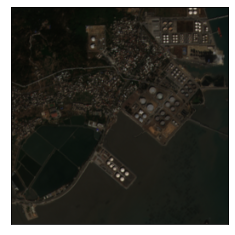

In [211]:
#Display RGB image
plt.imshow(rgb)


# remove ticks
plt.xticks([])
plt.yticks([])

plt.savefig(save_path+"rgb_1.png",bbox_inches="tight",dpi=300)

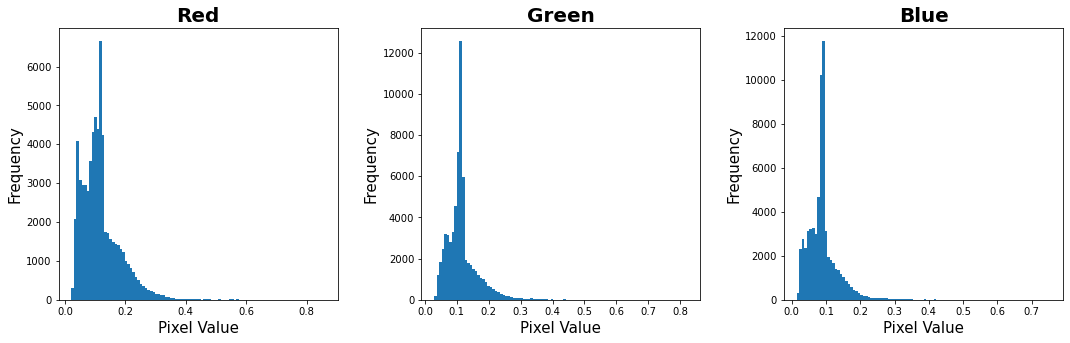

In [212]:
#Display histograms of pixel intesity for each band
fig, axs = plt.subplots(1,3,figsize=(18,5))
fig.patch.set_facecolor('xkcd:white')

labels = ['Red','Green','Blue']
for i,ax in enumerate(axs):
    ax.hist(rgb[:,:,i].flatten(),bins=100)
    ax.set_title(labels[i],size=20,fontweight="bold")
    ax.set_xlabel("Pixel Value",size=15)
    ax.set_ylabel("Frequency",size =15)

#Add padding between subplots
plt.subplots_adjust(wspace=0.3)
plt.savefig(save_path+"histograms.png",bbox_inches="tight",dpi=300)

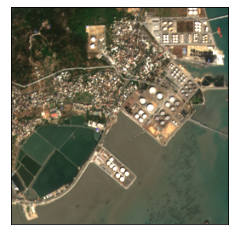

In [213]:
# Clip rgb image to 0.3
rgb = np.clip(rgb,0,0.3)/0.3

plt.imshow(rgb)

# remove ticks
plt.xticks([])
plt.yticks([])

plt.savefig(save_path+"rgb_2.png",bbox_inches="tight",dpi=300)

In [202]:
def visualise_rgb(img,clip=[0.3,0.3,0.3],display=True):
        """Visulaise RGB image with given clip values and return image"""

        # Scale image
        img = np.clip(img/10000,0,1)
        
        # Get RGB channels
        rgb = img[[3,2,1]]

        #clip rgb values
        rgb[0] = np.clip(rgb[0],0,clip[0])/clip[0]
        rgb[1] = np.clip(rgb[1],0,clip[1])/clip[1]
        rgb[2] = np.clip(rgb[2],0,clip[2])/clip[2]

        rgb = rgb.transpose(1,2,0)

        if display:

                #Display histograms of pixel intesity with given clip values
                fig, axs = plt.subplots(1,4,figsize=(22,5))
                fig.patch.set_facecolor('xkcd:white')

                labels = ['Red','Green','Blue']
                for i,ax in enumerate(axs[0:3]):
                        ax.hist(img[3-i].flatten(),bins=100)
                        ax.set_title(labels[i],size=20,fontweight="bold")
                        ax.axvline(clip[i],color="red",linestyle="--")
                        ax.set_yticks([])

                #Display RGB image
                axs[3].imshow(rgb)
                axs[3].set_title("RGB",size=20,fontweight="bold")
                axs[3].set_xticks([])
                axs[3].set_yticks([])

        return rgb

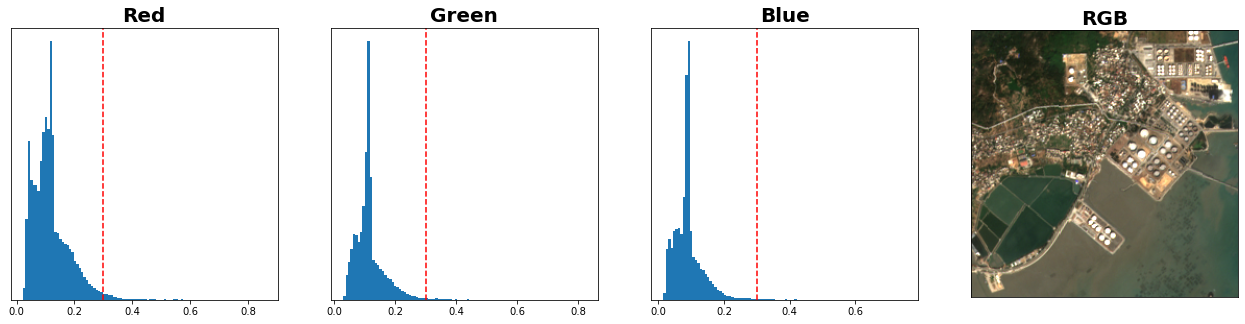

In [203]:
img = gdal.Open(paths[0]).ReadAsArray()
rgb = visualise_rgb(img,[0.3,0.3,0.3])

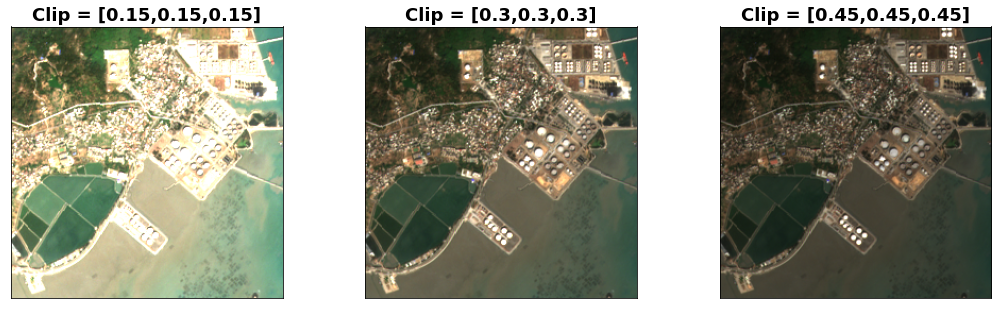

In [204]:
rgb_1 = visualise_rgb(img,[0.15,0.15,0.15],display=False)
rgb_2 = visualise_rgb(img,[0.3,0.3,0.3],display=False)
rgb_3 = visualise_rgb(img,[0.45,0.45,0.45],display=False)

# Plot RGB images with different clip values
fig, axs = plt.subplots(1,3,figsize=(18,5))
fig.patch.set_facecolor('xkcd:white')

axs[0].imshow(rgb_1)
axs[0].set_title("Clip = [0.15,0.15,0.15]",size=18,fontweight="bold")

axs[1].imshow(rgb_2)
axs[1].set_title("Clip = [0.3,0.3,0.3]",size=18,fontweight="bold")

axs[2].imshow(rgb_3)
axs[2].set_title("Clip = [0.45,0.45,0.45]",size=18,fontweight="bold")

# remove ticks
for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

plt.savefig(save_path+"rgb_contrast.png",bbox_inches="tight",dpi=300)

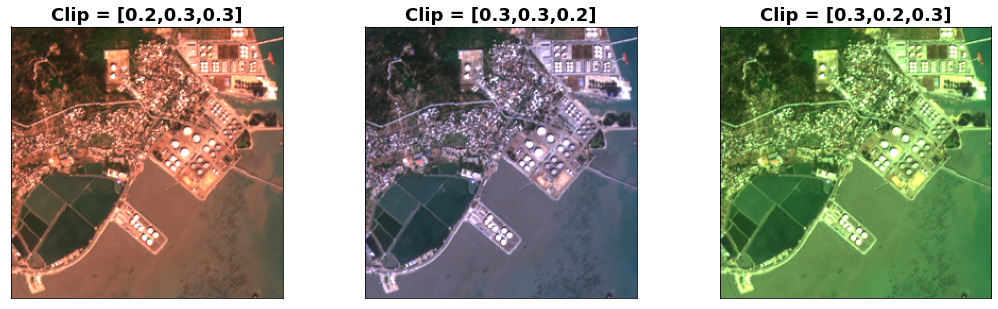

In [205]:
rgb_1 = visualise_rgb(img,[0.2,0.3,0.3],display=False)
rgb_2 = visualise_rgb(img,[0.3,0.3,0.2],display=False)
rgb_3 = visualise_rgb(img,[0.3,0.2,0.3],display=False)

# Plot RGB images with different clip values
fig, axs = plt.subplots(1,3,figsize=(18,5))
fig.patch.set_facecolor('xkcd:white')

axs[0].imshow(rgb_1)
axs[0].set_title("Clip = [0.2,0.3,0.3]",size=18,fontweight="bold")

axs[1].imshow(rgb_2)
axs[1].set_title("Clip = [0.3,0.3,0.2]",size=18,fontweight="bold")

axs[2].imshow(rgb_3)
axs[2].set_title("Clip = [0.3,0.2,0.3]",size=18,fontweight="bold")

# remove ticks
for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

plt.savefig(save_path+"rgb_colour.png",bbox_inches="tight",dpi=300)

## Cover image 

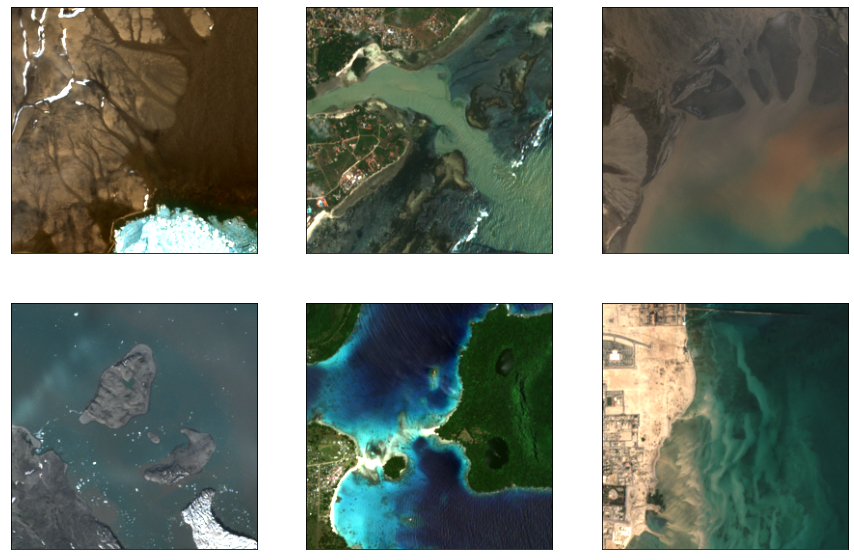

In [206]:
IDS = [79,90,13,17,64,87]
clip =[0.45,0.3,0.35,0.35,0.3,0.45]

rgbs = []
for i,ID in enumerate(IDS):
        img = gdal.Open(paths[ID]).ReadAsArray()
        clip_i = [clip[i]]*3
        rgb = visualise_rgb(img,clip_i,display=False)
        rgbs.append(rgb)


# Plot RGB images with different clip values
fig, axs = plt.subplots(2,3,figsize=(15,10))
fig.patch.set_facecolor('xkcd:white')

for i,ax in enumerate(axs.flatten()):
        ax.imshow(rgbs[i])
        ax.set_xticks([])
        ax.set_yticks([])

plt.savefig(save_path+"cover.png",bbox_inches="tight",dpi=300)